# 02_linear_regr

1. Utwórz baseline dla zbioru danych diabetes.

2. Utwórz LinearRegression dla ww zbioru.

<br>Podziel dane używając train_test_split
<br>Przetrenuj model
<br>Wyznacz y_pred, korzystając z tej metody
<br>Oblicz R^2 oraz RMSE <br>
<br>
3. Sprawdź wyniki po zastosowaniu regularyzacji Ridge i Lasso dla standardowych hyperparametrów.
4. Sprawdź wpływ parametru alpha na Ridge i Lasso:
<br>wykorzystaj for loop 
<br>zakres parametru alpha np.logspace(-4, 0, 50) i *np.linspace(start, stop,50)
<br>utwórz wykresy score vs alpha
<br>
5. *Wykorzystaj RidgeCV oraz LassoCV do danych z pkt. 4
6. *Porównaj wyniki (metryki)

Rozwiązanie prześlij jako printscreen (jpg, pdf).
Nazwa pliku (bez polskich znaków):

Nazwisko_Imie_02.jpg



In [1]:
import sklearn
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler

import warnings
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [2]:
X, y = load_diabetes()['data'], load_diabetes()['target']
df_result = pd.DataFrame(columns=['Model', 'Score'])

# 1

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)

## What is baseline?

Predicted outcome without running your dataset through any predictive model.

### For regression - mean
### For classification - mode

In [4]:
dummy_regr = DummyRegressor(strategy="mean").fit(X_train, y_train)
y_pred = dummy_regr.predict(X_test)

print("Baseline RMSE", mean_squared_error(y_test, y_pred, squared=False))
print("Baseline r2", r2_score(y_test, y_pred))

df1 = pd.DataFrame({'Model':"DummyRegressor" ,'Score':r2_score(y_test, y_pred)},index = [0])
df_result =pd.concat([df_result,df1],ignore_index=True)

Baseline RMSE 75.04707370222472
Baseline r2 -0.00019895737295327898


# 2

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)

In [6]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Baseline RMSE", mean_squared_error(y_test, y_pred, squared=False))
print("Baseline r2", r2_score(y_test, y_pred))

df1 = pd.DataFrame({'Model':"LinearRegression" ,'Score':r2_score(y_test, y_pred)},index = [0])
df_result =pd.concat([df_result,df1],ignore_index=True)

Baseline RMSE 57.262654452161655
Baseline r2 0.4176798412098468


# 3

In [7]:
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [8]:
ridge = Ridge().fit(X_train_std, y_train)
y_pred = ridge.predict(X_test_std)

print("Baseline RMSE", mean_squared_error(y_test, y_pred, squared=False))
print("Baseline r2", r2_score(y_test, y_pred))

df1 = pd.DataFrame({'Model':"Ridge" ,'Score':r2_score(y_test, y_pred)},index = [0])
df_result =pd.concat([df_result,df1],ignore_index=True)

Baseline RMSE 57.20791912871212
Baseline r2 0.4187925471850231


In [9]:
lasso = Lasso().fit(X_train_std, y_train)
y_pred = lasso.predict(X_test_std)

print("Baseline RMSE", mean_squared_error(y_test, y_pred, squared=False))
print("Baseline r2", r2_score(y_test, y_pred))

df1 = pd.DataFrame({'Model':"Lasso" ,'Score':r2_score(y_test, y_pred)},index = [0])
df_result =pd.concat([df_result,df1],ignore_index=True)

Baseline RMSE 57.34089195344369
Baseline r2 0.41608751552254397


# 4

In [19]:
alpha_log = np.logspace(-4, 0,50)
df = pd.DataFrame(columns=['Reg', 'Alpha', 'Score'])

for a in alpha_log:
    
    ridge = Ridge(a).fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    score = ridge.score(X_train,y_train)
    
    df1 = pd.DataFrame({'Reg':"ridge" , 'Alpha': a, 'Score':score} ,index = [0])
    df =pd.concat([df,df1],ignore_index=True)
    
    lasso = Lasso(a).fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    score = lasso.score(X_train,y_train)

    df1 = pd.DataFrame({'Reg':"lasso" , 'Alpha': a, 'Score':score} ,index = [0])
    df =pd.concat([df,df1],ignore_index=True)


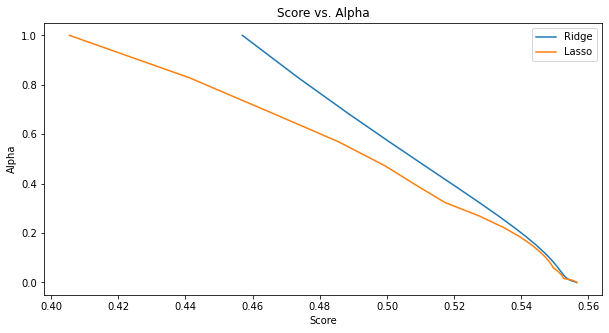

In [20]:
ridge = df.query("Reg == 'ridge'")
lasso = df.query("Reg == 'lasso'")

plt.figure(figsize=(10,5))
plt.plot(ridge.Score, ridge.Alpha, label = "Ridge")
plt.plot(lasso.Score, lasso.Alpha, label = "Lasso")
plt.title("Score vs. Alpha")
plt.xlabel("Score")
plt.ylabel("Alpha")
plt.legend()
plt.show()

In [18]:
alpha_log = np.logspace(-4, 0,50)
cv = list(range(2, 42, 2))
df_cv = pd.DataFrame(columns=['Reg', 'CV', 'Score'])



for c in cv:
    
    ridge = RidgeCV(alphas = alpha_log, cv=c).fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    score = ridge.score(X_train,y_train)
    
    df1 = pd.DataFrame({'Reg':"ridge" , 'CV': c, 'Score':score} ,index = [0])
    df_cv =pd.concat([df_cv,df1],ignore_index=True)
    
    lasso = LassoCV(alphas = alpha_log, cv=c).fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    score = lasso.score(X_train,y_train)

    df1 = pd.DataFrame({'Reg':"lasso" , 'CV': c, 'Score':score} ,index = [0])
    df_cv =pd.concat([df_cv,df1],ignore_index=True)


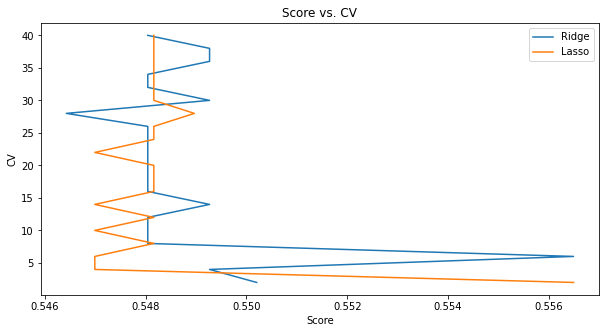

In [13]:
ridge_cv = df_cv.query("Reg == 'ridge'")
lasso_cv = df_cv.query("Reg == 'lasso'")

df1 = pd.DataFrame({'Model':"RidgeCV" ,'Score':statistics.mean(ridge_cv["Score"])},index = [0])
df_result =pd.concat([df_result,df1],ignore_index=True)

df1 = pd.DataFrame({'Model':"LassoCV" ,'Score':statistics.mean(lasso_cv["Score"])},index = [0])
df_result =pd.concat([df_result,df1],ignore_index=True)


plt.figure(figsize=(10,5))
plt.plot(ridge_cv.Score, ridge_cv.CV, label = "Ridge")
plt.plot(lasso_cv.Score, lasso_cv.CV, label = "Lasso")
plt.title("Score vs. CV")
plt.xlabel("Score")
plt.ylabel("CV")
plt.legend()
plt.show()





# 5

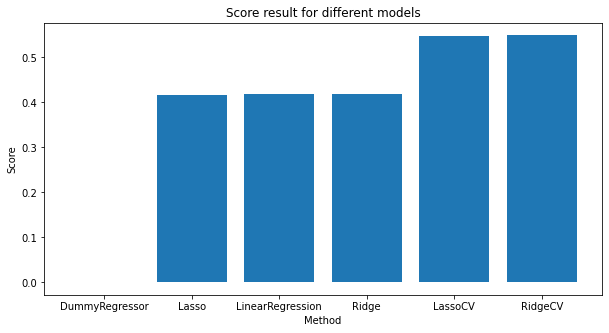

In [14]:
df_result = df_result.sort_values(by=['Score'])

fig = plt.figure(figsize = (10, 5))
plt.bar(df_result.Model, df_result.Score)
plt.title("Score result for different models")
plt.xlabel("Method")
plt.ylabel("Score")

plt.show()